In [1]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.7 MB/s eta 0:00:00


In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline
from rdkit import Chem

tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MLM")
model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MLM")

# Create pipeline
pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pytorch_model.bin:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

In [3]:
# Given masked SMILES
smiles_list = [
    "C1=CC=CC[MASK]C1",
    "CN1C=[MASK]C2=C1C(=O)N(C(=O)N2C)C",
    "CC12CCC3C(C1CCC2O)CCC4=C3C=CC(=C4)[MASK]"
]

predicted_smiles = []
for smiles in smiles_list:
    # Get predictions
    results = pipe(smiles)
    #print(results)
    # Get the highest scored prediction
    best_prediction = results[0]['sequence']
    predicted_smiles.append(best_prediction)

print(predicted_smiles)


['C1=CC=CC=C1', 'CN1C=CC2=C1C(=O)N(C(=O)N2C)C', 'CC12CCC3C(C1CCC2O)CCC4=C3C=CC(=C4)C']


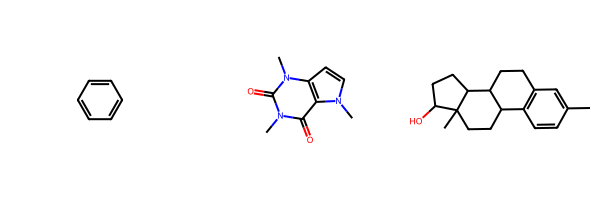

In [4]:
# Convert smiles to mols using rdkit
molecules = [Chem.MolFromSmiles(smiles) for smiles in predicted_smiles]
# Adjust graph dimension
img = Chem.Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200,200))

img